## Orignal code In Matlab
 

# Python code

In [4]:
import numpy as np

Ne=400      # Excitatory neurons 
Ni=200      # Inhibitory neurons
float_type = np.float

re=np.random.rand(Ne).astype(float_type)
ri=np.random.rand(Ni).astype(float_type)

#The parameter "a" describes the time scale of the recovery variable u
a=np.concatenate((0.02*np.ones(Ne),0.02+0.08*ri)).astype(float_type) 
  
# The parameter "b" describes the sensitivity of the recovery variable
# u to the subthreshold fluctuations of the membrane potential v
b=np.concatenate((0.2*np.ones(Ne),0.25-0.05*ri)).astype(float_type)



#parameter c describes the after-spike reset value of the membrane potential v caused by the fast high-threshold K+ conductance
c=np.concatenate((-65+15*re**2,-65*np.ones(Ni))).astype(float_type)

#The parameter d describes after-spike reset of the recovery variable u caused by slow high-threshold Na+ and K+ conductances
d=np.concatenate((8-6*re**2,2*np.ones(Ni))).astype(float_type)

# Excitatory and Inhibitory weights
S=np.hstack([0.5*np.random.rand(Ne+Ni,Ne),\
                -np.random.rand(Ne+Ni,Ni)]).astype(float_type)

# Initial membrane voltage
v=-65*np.ones(Ne+Ni, dtype=float_type)

# State variable (recovery)
u=(b*v)


Nsteps = 1000   # simulation of 1000 ms
step = 0.5      # step 0.5 ms
step_3 = step/3.0

firings_ids=np.empty((Nsteps,Ne+Ni),dtype=float_type)

voltages=np.empty((Nsteps,Ne+Ni),dtype=float_type)
voltages_cropped=np.empty((Nsteps,Ne+Ni),dtype=float_type)

I=np.concatenate((5*np.random.normal(loc=0,scale=1,size=Ne),\
                     2*np.random.normal(loc=0,scale=1,size=Ni))).astype(float_type) # thalamic input

C:\Users\ankit\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [5]:
for t in range(Nsteps):
    I=np.concatenate((5*np.random.normal(loc=0,scale=1,size=Ne),\
                         2*np.random.normal(loc=0,scale=1,size=Ni))).astype(float_type) # thalamic noisy input
    fired=(v>=30) # finds spiking neurons indices
    firings_ids[t,:]=fired
    voltages[t,:]=v # I'm saving before the cropping
    v[fired]=c[fired]
    voltages_cropped[t,:]=v # Here I'm saving after crop
    
    u[fired]=u[fired]+d[fired]
    I=I+S[:,fired].sum(axis=1)
    
    # Integration
    v+=step*(0.04*v**2+5*v+140-u+I)
    u+=step*a*(b*v-u)

In [6]:
ids=np.arange(1,Ne+Ni+1)
pfired = []
tfired = []
for t,fired in zip(range(Nsteps),firings_ids):
    res=ids[fired==1]
    for fi in res:
        pfired.append(fi)
        tfired.append(t)
pfired = np.array(pfired)
tfired = np.array(tfired)

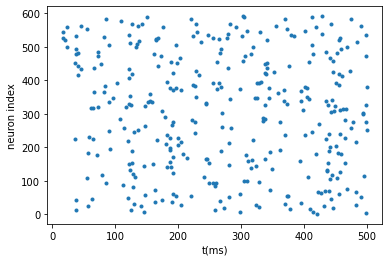

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(tfired*step,pfired,'.')
plt.xlabel("t(ms)")
plt.ylabel("neuron index")
plt.show()

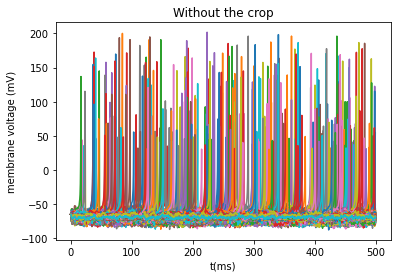

In [8]:
plt.plot(np.arange(Nsteps)*step,voltages[:,:])
plt.title("Without the crop")
plt.xlabel("t(ms)")
plt.ylabel("membrane voltage (mV)")
plt.show()

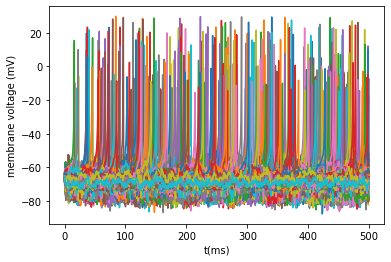

In [9]:
plt.plot(np.arange(Nsteps)*step,voltages_cropped[:,:])
plt.xlabel("t(ms)")
plt.ylabel("membrane voltage (mV)")
plt.show()